In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Set Up** After importining the necessary libraries to do descriptive and inferential statistics we take a first look at the data. 

In [2]:
data = pd.read_csv('Kyoto_Restaurant_Info.csv')

In [3]:
data.head()


,Unnamed: 0,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long
0,1,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,￥4000～￥4999,￥2000～￥2999,3.39,3.20,3.38,56,34.986175,135.761314
1,2,Steak Frites Gaspard zinzin,ステックフリット ガスパール ザンザン,Karasuma,Bistro,Steak,￥3000～￥3999,￥1000～￥1999,3.18,3.06,3.33,70,35.005826,135.759857
2,3,KAZUMA,和馬,Sanjo,Izakaya (Tavern),Japanese food (other),￥3000～￥3999,NaN,3.28,3.28,NaN,7,35.006583,135.770247
3,4,okonomiyakiteppanyakimiki,お好み焼き 鉄板焼き 三喜,Tambaguchi,Okonomiyaki,Izakaya (Tavern),￥3000～￥3999,NaN,3.14,3.14,NaN,16,34.995924,135.748267
4,5,Shaofeiyan,小肥羊 京都河原町店,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,￥4000～￥4999,￥1000～￥1999,3.16,3.16,3.05,23,35.007901,135.768202


In [4]:
data.columns

Index(['Unnamed: 0', 'Name', 'JapaneseName', 'Station', 'FirstCategory',
       'SecondCategory', 'DinnerPrice', 'LunchPrice', 'TotalRating',
       'DinnerRating', 'LunchRating', 'ReviewNum', 'Lat', 'Long'],
      dtype='object')

In [5]:
data.dtypes

Unnamed: 0          int64
Name               object
JapaneseName       object
Station            object
FirstCategory      object
SecondCategory     object
DinnerPrice        object
LunchPrice         object
TotalRating       float64
DinnerRating      float64
LunchRating       float64
ReviewNum           int64
Lat               float64
Long              float64
dtype: object

In [6]:
data['TotalRating'].describe()

count    895.000000
mean       3.212480
std        0.215588
min        3.000000
25%        3.050000
50%        3.090000
75%        3.420000
max        4.190000
Name: TotalRating, dtype: float64

In [7]:
data.corr()

,Unnamed: 0,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long
Unnamed: 0,1.000000,0.088339,0.041732,0.048770,0.101474,-0.018645,-0.049550
TotalRating,0.088339,1.000000,0.920213,0.813692,0.326734,0.036272,0.033592
DinnerRating,0.041732,0.920213,1.000000,0.593806,0.281516,0.039288,0.033378
LunchRating,0.048770,0.813692,0.593806,1.000000,0.333693,0.089608,-0.001282
ReviewNum,0.101474,0.326734,0.281516,0.333693,1.000000,-0.025752,0.040495
Lat,-0.018645,0.036272,0.039288,0.089608,-0.025752,1.000000,-0.802595
Long,-0.049550,0.033592,0.033378,-0.001282,0.040495,-0.802595,1.000000


The strongest correlated variables are 'DinnerRating' and 'LunchRating' with 'TotalRating'. No surprise there. 

In [8]:
data.isnull().sum()

Unnamed: 0          0
Name                0
JapaneseName        0
Station             0
FirstCategory       0
SecondCategory     28
DinnerPrice         0
LunchPrice        411
TotalRating         0
DinnerRating        0
LunchRating       402
ReviewNum           0
Lat                 0
Long                0
dtype: int64

In [9]:
data.dropna(inplace=True)

**Data Cleaning** dropped null values but kept DataFrame with valid entries in the same variable. 

In [10]:
data.isnull().sum()

Unnamed: 0        0
Name              0
JapaneseName      0
Station           0
FirstCategory     0
SecondCategory    0
DinnerPrice       0
LunchPrice        0
TotalRating       0
DinnerRating      0
LunchRating       0
ReviewNum         0
Lat               0
Long              0
dtype: int64

/Users/joshuayoung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joshuayoung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65374 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/joshuayoung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65509 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/joshuayoung/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65374 missing from current font.
  font.set_text(s, 0, flags=flags)


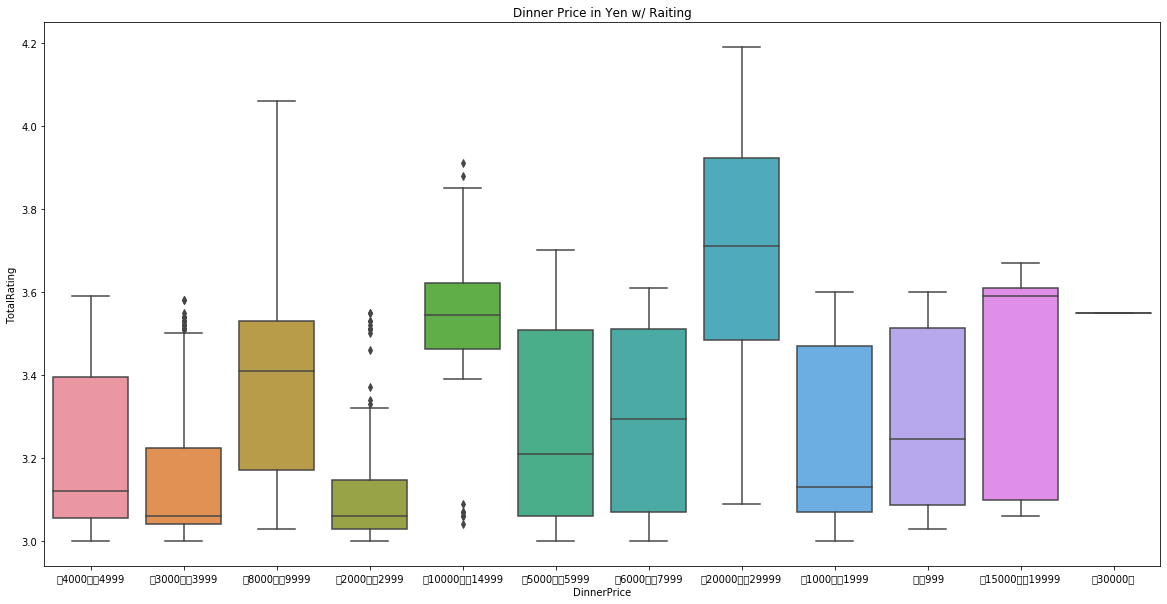

In [11]:
plt.figure(figsize=(20, 10))
plt.title('Dinner Price in Yen w/ Raiting')
sns.boxplot(x='DinnerPrice', y='TotalRating', data=data);

It looks like the best restaurants dinner price is between ¥20,000 - ¥29,999. Restaurant dinner prices' from ¥10,000 - ¥14,999 have the most outliers for low raiting scores. 

To make this more readable for myself an American citizen I will be converting the Yen range into the average of the range in USD. 
Using the conversion 100 Yen = $0.94.

In [12]:
data['DinnerPrice'].unique()

array(['￥4000～￥4999', '￥3000～￥3999', '￥8000～￥9999', '￥2000～￥2999',
       '￥10000～￥14999', '￥5000～￥5999', '￥6000～￥7999', '￥20000～￥29999',
       '￥1000～￥1999', ' ～￥999', '￥15000～￥19999', '￥30000～'], dtype=object)

In [13]:
data.replace('￥4000～￥4999', '42', inplace=True)
data.replace('￥3000～￥3999', '33', inplace=True)
data.replace('￥8000～￥9999', '85', inplace=True)
data.replace('￥2000～￥2999', '24', inplace=True)
data.replace('￥10000～￥14999', '117', inplace=True)
data.replace('￥5000～￥5999', '52', inplace=True)
data.replace('￥6000～￥7999', '65', inplace=True)
data.replace('￥20000～￥29999', '235', inplace=True)
data.replace('￥1000～￥1999', '14', inplace=True)
data.replace('～￥999', '9', inplace=True)
data.replace('￥15000～￥19999', '165', inplace=True)
data.replace('￥30000～', '282', inplace=True)

In [14]:
data.head()

,Unnamed: 0,Name,JapaneseName,Station,FirstCategory,SecondCategory,DinnerPrice,LunchPrice,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long
0,1,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,42,24,3.39,3.20,3.38,56,34.986175,135.761314
1,2,Steak Frites Gaspard zinzin,ステックフリット ガスパール ザンザン,Karasuma,Bistro,Steak,33,14,3.18,3.06,3.33,70,35.005826,135.759857
2,3,KAZUMA,和馬,Sanjo,Izakaya (Tavern),Japanese food (other),33,NaN,3.28,3.28,NaN,7,35.006583,135.770247
3,4,okonomiyakiteppanyakimiki,お好み焼き 鉄板焼き 三喜,Tambaguchi,Okonomiyaki,Izakaya (Tavern),33,NaN,3.14,3.14,NaN,16,34.995924,135.748267
4,5,Shaofeiyan,小肥羊 京都河原町店,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,42,14,3.16,3.16,3.05,23,35.007901,135.768202


In [17]:
data.rename(columns={'DinnerPrice': 'AVG_DinnerPrice_USD$', 
                     'LunchPrice': 'AVG_LunchPrice_USD'},inplace=True)

In [18]:
data.columns

Index(['Unnamed: 0', 'Name', 'JapaneseName', 'Station', 'FirstCategory',
       'SecondCategory', 'AVG_DinnerPrice_USD$', 'AVG_LunchPrice_USD',
       'TotalRating', 'DinnerRating', 'LunchRating', 'ReviewNum', 'Lat',
       'Long'],
      dtype='object')

In [19]:
data.dtypes

Unnamed: 0                int64
Name                     object
JapaneseName             object
Station                  object
FirstCategory            object
SecondCategory           object
AVG_DinnerPrice_USD$     object
AVG_LunchPrice_USD       object
TotalRating             float64
DinnerRating            float64
LunchRating             float64
ReviewNum                 int64
Lat                     float64
Long                    float64
dtype: object

In [22]:
# Lets change the Dinner and Lunch Prices from objects into floats. 

data['AVG_DinnerPrice_USD$'] = pd.to_numeric(data['AVG_DinnerPrice_USD$'],errors='coerce')

data['AVG_LunchPrice_USD'] = pd.to_numeric(data['AVG_LunchPrice_USD'],errors='coerce')


In [23]:
data.dtypes

Unnamed: 0                int64
Name                     object
JapaneseName             object
Station                  object
FirstCategory            object
SecondCategory           object
AVG_DinnerPrice_USD$    float64
AVG_LunchPrice_USD      float64
TotalRating             float64
DinnerRating            float64
LunchRating             float64
ReviewNum                 int64
Lat                     float64
Long                    float64
dtype: object

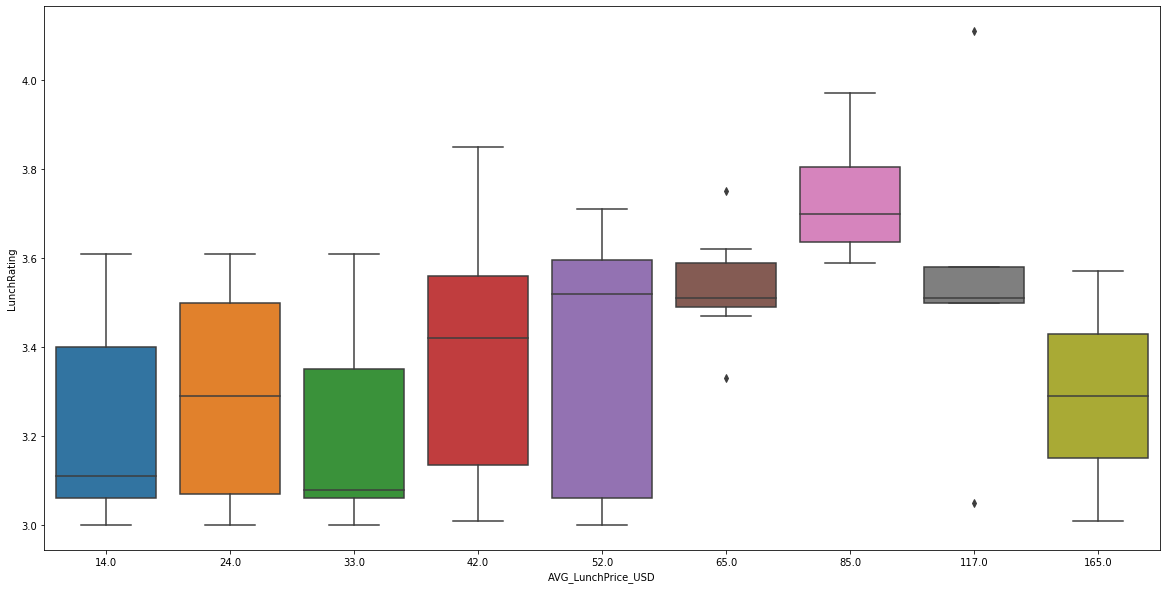

In [27]:

plt.figure(figsize=(20, 10))
sns.boxplot(x='AVG_LunchPrice_USD', y='LunchRating', data=data);

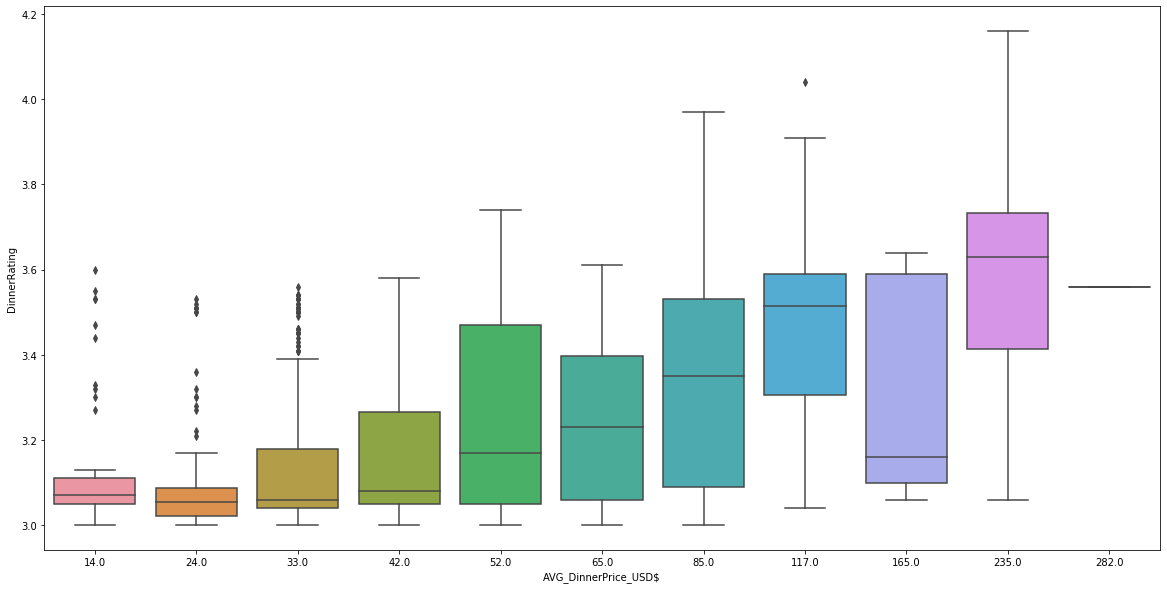

In [26]:

plt.figure(figsize=(20, 10))
sns.boxplot(x='AVG_DinnerPrice_USD$', y='DinnerRating', data=data);


**Insight**

Obvious correlation that the more you spend in lunch and dinner the better quality meal you can expect. Though, the bang for your buck, or the amount you pay to the quality you receive is not linear. 

We will create our own variable to better compare a restaurants rating and their coresponding meal price. This will be done by dividing the average meal price with its corresponding raiting.

In [29]:
# To better quantify our results we will be creating a new column that takes the average meal price and divides it with the corresponding rating. This will give us a 'Cost/Rating Variable'

data['Cost_Rating_Dinner'] = data['AVG_DinnerPrice_USD$'] / data['DinnerRating']

data['Cost_Rating_Lunch'] = data ['AVG_LunchPrice_USD'] / data['LunchRating']
data.head()


,Unnamed: 0,Name,JapaneseName,Station,FirstCategory,SecondCategory,AVG_DinnerPrice_USD$,AVG_LunchPrice_USD,TotalRating,DinnerRating,LunchRating,ReviewNum,Lat,Long,Cost_Rating_Dinner,Cost_Rating_Lunch
0,1,Orudeidainingurajou,オールデイダイニング ラジョウ,Kyoto,Buffet style,Cafe,42.0,24.0,3.39,3.20,3.38,56,34.986175,135.761314,13.125000,7.100592
1,2,Steak Frites Gaspard zinzin,ステックフリット ガスパール ザンザン,Karasuma,Bistro,Steak,33.0,14.0,3.18,3.06,3.33,70,35.005826,135.759857,10.784314,4.204204
2,3,KAZUMA,和馬,Sanjo,Izakaya (Tavern),Japanese food (other),33.0,NaN,3.28,3.28,NaN,7,35.006583,135.770247,10.060976,NaN
3,4,okonomiyakiteppanyakimiki,お好み焼き 鉄板焼き 三喜,Tambaguchi,Okonomiyaki,Izakaya (Tavern),33.0,NaN,3.14,3.14,NaN,16,34.995924,135.748267,10.509554,NaN
4,5,Shaofeiyan,小肥羊 京都河原町店,Kyoto Shiyakusho Mae,Chinese hot pot / fire pot,Chinese,42.0,14.0,3.16,3.16,3.05,23,35.007901,135.768202,13.291139,4.590164


In [30]:
data['Cost_Rating_Dinner'].describe()

count    871.000000
mean      13.840151
std        8.992631
min        3.888889
25%        9.677419
50%       10.891089
75%       14.222222
max       79.213483
Name: Cost_Rating_Dinner, dtype: float64

In [31]:
data['Cost_Rating_Lunch'].describe()

count    298.000000
mean       8.061332
std        6.366779
min        3.878116
25%        4.487179
50%        4.666667
75%       10.353867
max       54.817276
Name: Cost_Rating_Lunch, dtype: float64

The new variables, 'Cost_Rating_Lunch' and 'Cost_Rating_Dinner' are used to sort the datas best restaurants in Tableau. You can see the results in the presentaion PowerPoint. 

In [ ]:
data.to_csv(r'Kyoto_Data_BFB.csv', index = False)